In [1]:
import pandas as pd
import numpy as np
from os import listdir
import cv2 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

A sample file name: unsplash_100813.jpg
Shape information of two arbitrary images: (533, 800, 3) - this one is shown below, and (533, 800, 3)


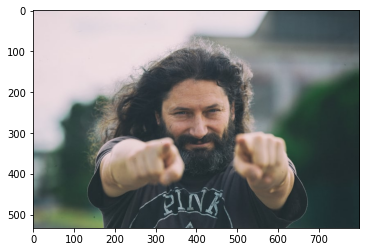

In [5]:
dir_struct = 'C:/Users/wania/Desktop/Coursework_1/images/'
file_lst = listdir(dir_struct) # it will return all the image file names as a list
print('A sample file name: {}'.format(file_lst[5]))

# Change color to RGB from OpenCV's BGR format since this library uses BGR format [rather than RGB] for historical purposes
# an interesting perspective on why OpenCV uses BGR : https://learnopencv.com/why-does-opencv-use-bgr-color-format/
image = cv2.imread(dir_struct+file_lst[5])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('Shape information of two arbitrary images: {} - this one is shown below, and {}'.format(image.shape, cv2.imread(dir_struct+file_lst[5]).shape))
plt.imshow(image)

In [6]:
class_names = ['brown', 'black', 'gray', 'blond', 'red',
               'white', 'mixed', 'other', 'not visible']
               
df  = pd.read_csv('C:/Users/wania/Desktop/Coursework_1/annotations.csv')
print('Number of images: ', df.shape[0])
print('The proportion of the different hair color labels: ')
# you may see equal proportion: logical since we have randomly assigned the label
df.hair_color.value_counts(sort=False)

Number of images:  1000
The proportion of the different hair color labels: 


0     78
1    254
2     10
3     61
4      3
5     16
6     43
7     14
8    521
Name: hair_color, dtype: int64

,image_name,wrinkles,freakles,glasses,hair_color,hair_top,no_face_shown,image
0,unsplash_612.jpg,0,0,1,0,2,0,"[[[52, 59, 52], [52, 58, 51], [56, 59, 49], [6..."
1,unsplash_952.jpg,0,1,0,1,2,0,"[[[105, 127, 100], [106, 128, 101], [107, 129,..."
2,unsplash_984.jpg,0,0,0,1,2,0,"[[[184, 61, 75], [190, 63, 80], [195, 66, 86],..."
3,unsplash_1003.jpg,0,0,0,3,2,0,"[[[186, 224, 243], [187, 226, 246], [190, 228,..."
4,unsplash_1092.jpg,0,0,0,8,3,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


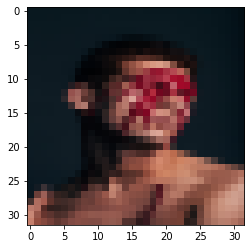

In [7]:
image_lst = [] # this list will hold all the images
#for i in range(1):
for i in range(df.shape[0]): # read the image one by one
    image = cv2.imread(dir_struct+df.iloc[i]['image_name'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB convert
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA) # resizing all images to 32x32: NOT ideal but need to be uniform in order to apply the algorithm
                                                                                                                        # this actually ensures all the features [pixel values] will be of same size
    image_lst.append(image) # appending the read image to a list

df['image'] = image_lst # creating a new column that holds all the images
# showing the same image that we have displayed before
# see the change because of resizing
plt.imshow(df.iloc[5]['image'])
df.head(5)

In [8]:
X = df.drop(['image_name','wrinkles','freakles','glasses','hair_color','hair_top','no_face_shown'], axis=1)
y = df['hair_color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

In [9]:
print('Training dataset shape: {}'.format(X_train.shape))
print('Testing dataset shape: {}'.format(X_test.shape))
print('Training dataset shape: {}'.format(y_train.shape))
print('Testing dataset shape: {}'.format(y_test.shape))

print(X_train.head(10))

print(y_train.head(2))

Training dataset shape: (700, 1)
Testing dataset shape: (300, 1)
Training dataset shape: (700,)
Testing dataset shape: (300,)
                                                 image
693  [[[28, 28, 28], [28, 28, 28], [28, 28, 28], [2...
310  [[[86, 81, 77], [108, 101, 95], [126, 119, 113...
182  [[[37, 38, 40], [36, 37, 39], [37, 38, 40], [3...
151  [[[64, 65, 67], [61, 62, 64], [33, 35, 37], [3...
610  [[[123, 111, 75], [115, 103, 64], [124, 109, 7...
507  [[[220, 245, 240], [229, 241, 241], [232, 227,...
744  [[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...
575  [[[223, 228, 232], [223, 228, 232], [224, 227,...
875  [[[198, 124, 161], [201, 127, 164], [203, 131,...
713  [[[36, 33, 26], [36, 33, 25], [39, 35, 26], [3...
693    8
310    8
Name: hair_color, dtype: int64


In [10]:
X_train['image'] = X_train['image'].apply(lambda x:x.reshape(1, 3072)[0])
X_test['image'] = X_test['image'].apply(lambda x:x.reshape(1, 3072)[0])

X_train = np.reshape([x for x in X_train['image'].values], (X_train.shape[0], 3072))
X_test = np.reshape([x for x in X_test['image'].values], (X_test.shape[0], 3072))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)
X_train /= 255
X_test /= 255

<ipython-input-10-523c52b06302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['image'] = X_train['image'].apply(lambda x:x.reshape(1, 3072)[0])
<ipython-input-10-523c52b06302>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['image'] = X_test['image'].apply(lambda x:x.reshape(1, 3072)[0])


In [11]:
# at this point, we have converted the image dataset to be used for Logistic Regression
# how many features are there for each image for this converted dataset?
print('Flattened training dataset shape: {}'.format(X_train.shape))
print('Flattened Testing dataset shape: {}'.format(X_test.shape))

Flattened training dataset shape: (700, 3072)
Flattened Testing dataset shape: (300, 3072)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

# just normal Logistic Regression with sklearn's default parameters
# no feature engineering, hyper-parameter tuning etc. are performed here
lr = LogisticRegression()
lr = lr.fit(X_train, y_train) # also, the categorical values are automatically detected as multi-class for sklearn's implementation
                                          # but need to be cautious depending on the choice of algorithm and its implementation details in sklearn

# THE FOLLOWING PART: GridSearch has been disabled for this notebook -- way too many features, may take a long time to converge
# Also, the choice of algorithm may not be suitable for this dataset anyway: shown only for demonstration purpose

#hyper-parameter tuning using in-built GridSearchCV
# This may take a while: good to set the max_iter parameter as well...
param_grid=[{'C': np.logspace(-4,4,15)},
           {'penalty': ['l2']},
           {'solver': ['lbfgs']},
           {'max_iter': [10000]}]

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy', refit=True) # you can change scoring function that will impact the estimator
grid = grid.fit(X_train, y_train)
print('Best estimator: {}\nWeights: {}, Intercept: {}\nBest params: {}\nScorer: {}'.format(grid.best_estimator_, grid.best_estimator_.coef_, grid.best_estimator_.intercept_,grid.best_params_, grid.scorer_))
print('Available parameters for the estimator (fine-tuning): ',lr.get_params().keys())

/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [13]:
y_train_predict = lr.predict(X_train)
print("Training SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict, average='macro'), recall_score(y_train, y_train_predict, average='macro'), f1_score(y_train, y_train_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

# model evaluation for testing set
y_test_predict = lr.predict(X_test)

print("\nTesting SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict, average='macro'), recall_score(y_test, y_test_predict, average='macro'), f1_score(y_test, y_test_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))

Training SET
--------------------------------------
Accuracy: 0.943, Precision: 0.971, Recall: 0.910, F1 Score: 0.938
Confusion Matrix:
 [[ 45   4   0   0   0   0   0   0   5]
 [  0 161   0   1   0   1   0   0  15]
 [  0   0   6   0   0   0   0   0   1]
 [  0   2   0  40   0   0   0   0   1]
 [  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0  10   0   0   1]
 [  0   1   0   0   0   0  26   0   3]
 [  0   0   0   0   0   0   0   9   1]
 [  1   3   0   0   0   0   0   0 361]]

Testing SET
--------------------------------------
Accuracy: 0.410, Precision: 0.126, Recall: 0.124, F1 Score: 0.123
Confusion Matrix:
 [[  0   3   0   3   0   0   1   0  17]
 [  9  20   1   2   0   0   2   0  42]
 [  0   0   0   0   0   0   0   0   3]
 [  2   4   0   1   0   0   0   1  10]
 [  1   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   1   0   2]
 [  0   0   0   2   0   0   2   0   9]
 [  0   1   0   0   0   0   0   0   3]
 [  7  39   0   4   0   1   3   2 100]]
C:\Python\Python39\lib

ROC AUC (Training: Class 0 vs Rest)=0.992
ROC AUC (Testing: Class 0 vs Rest)=0.447


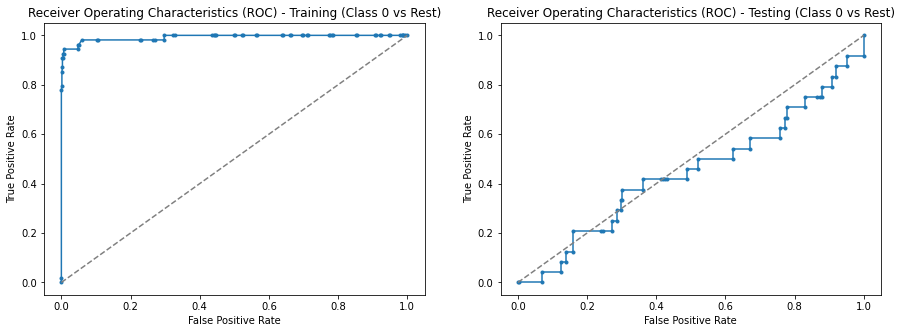

In [14]:
# this part is for the ROC curve
# since we have 10 different classes: we have only shown the curve using class 0 vs rest of the class
# the others can be shown in similar way or even plot inside the same graph
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# specify the class for which you want to view the ROC
class_number = 0

# predict probabilities
lr_probs_train = lr.predict_proba(X_train)
lr_probs_test = lr.predict_proba(X_test)

# roc curve statistics [false and true positive rates] for classes
fpr_train = {}
tpr_train = {}
fpr_test = {}
tpr_test = {}
thresh_train ={}
thresh_test = {}

# true positive rate and false positive rate for all classes: One vs Rest Classifier
for i in range(len(class_names)):    
    fpr_train[i], tpr_train[i], thresh_train[i] = roc_curve(y_train, lr_probs_train[:,i], pos_label=i)
    fpr_test[i], tpr_test[i], thresh_test[i] = roc_curve(y_test, lr_probs_test[:,i], pos_label=i)

print('ROC AUC (Training: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_train[class_number], tpr_train[class_number])))
print('ROC AUC (Testing: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_test[class_number], tpr_test[class_number])))
  
# plot the roc curve for the training set: shown only regarding Class 0
_ = plt.figure(figsize=(15, 5))
ax1 =plt.subplot(121)
_ = ax1.plot(fpr_train[0], tpr_train[0], marker='.') # change the index here to view Class 1 vs Rest, Class 2 vs Rest, etc.
_ = ax1.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training (Class {} vs Rest)'.format(class_number))
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

# plot the roc curve for the testing set: shown only regarding Class 0
ax2 = plt.subplot(122)
_ = ax2.plot(fpr_test[0], tpr_test[0], marker='.')
_ = ax2.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing (Class {} vs Rest)'.format(class_number))
_ = ax2.set_xlabel('False Positive Rate')
_ = ax2.set_ylabel('True Positive Rate')

In [15]:
from sklearn.decomposition import PCA

# checking with various n_components of PCA
# and storing the result -- cumulative variance explained by the transformed features
comp_num_lst = [2, 10, 20, 30, 50, 100, 250, 650]
var_exp_lst = []

for comp_num in comp_num_lst:
    pca_cifar = PCA(n_components=comp_num)
    pca_cifar_transform = pca_cifar.fit_transform(X_train)
    var_exp_lst.append(np.sum(pca_cifar.explained_variance_ratio_))

Explained Variances: {2: 0.5022001, 10: 0.7138113, 20: 0.7937067, 30: 0.8355969, 50: 0.88246006, 100: 0.9345406, 250: 0.98140025, 650: 0.99996656}


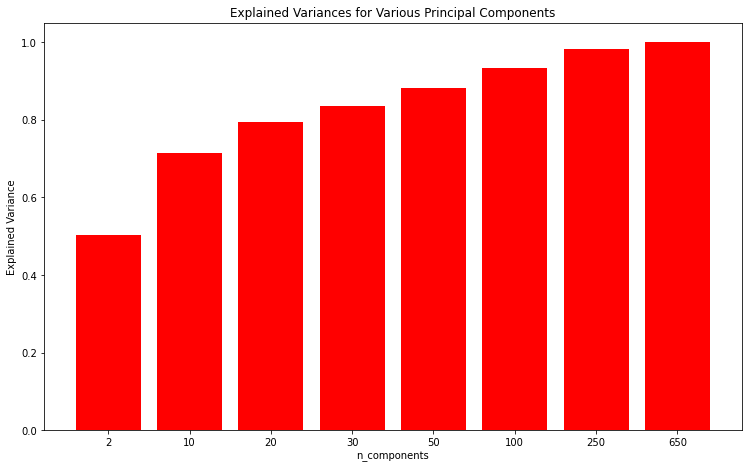

In [16]:
ind = [i for i in range(len(comp_num_lst))]

_ = plt.figure(figsize=(12.5, 7.5))
ax1 =plt.subplot(111)
_ = ax1.set_xticks(ind)
_ = ax1.set_xticklabels(comp_num_lst)
_ = ax1.bar(ind, var_exp_lst, width=0.8, color='red')
_ = ax1.set_title('Explained Variances for Various Principal Components')
_ = ax1.set_xlabel('n_components')
_ = ax1.set_ylabel('Explained Variance')

print('Explained Variances: {}'.format(dict(zip(comp_num_lst, var_exp_lst))))
plt.show()

In [17]:
from sklearn.pipeline import make_pipeline

# creating a pipeline: first PCA() and then the classifier
# PCA's n_component can be set using the analysis above: note that here again GridSearchCV could be used to find n_components for PCA
pipeline_lr = make_pipeline(PCA(n_components=250), LogisticRegression())
pipeline_lr = pipeline_lr.fit(X_train, y_train)
print('Weights: {}'.format(pipeline_lr['logisticregression'].coef_))

Weights: [[-0.00775645 -0.08629366 -0.07207957 ... -0.11093786 -0.00177282
   0.07298512]
 [ 0.01613469  0.0364199   0.01794249 ... -0.04659706  0.1474791
  -0.19624347]
 [-0.04967214 -0.01711133 -0.05329728 ... -0.15494404  0.19524934
   0.16704018]
 ...
 [-0.0446262  -0.03181455  0.08000085 ...  0.04879561 -0.29236543
   0.49708974]
 [ 0.03650304  0.0809714   0.13257791 ... -0.24585385 -0.1991935
   0.27702322]
 [ 0.02441347  0.03576858 -0.04090312 ...  0.55706186 -0.67869527
  -0.92557256]]
C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_r

In [18]:
# model evaluation for training set
y_train_predict = pipeline_lr.predict(X_train)
print("Training SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict, average='macro'), recall_score(y_train, y_train_predict, average='macro'), f1_score(y_train, y_train_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_train, y_train_predict)))

# model evaluation for testing set
y_test_predict = pipeline_lr.predict(X_test)

print("\nTesting SET")
print("--------------------------------------")
print('Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}'.format(accuracy_score(y_test, y_test_predict), precision_score(y_test, y_test_predict, average='macro'), recall_score(y_test, y_test_predict, average='macro'), f1_score(y_test, y_test_predict, average='macro')))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_test_predict)))

Training SET
--------------------------------------
Accuracy: 0.883, Precision: 0.966, Recall: 0.858, F1 Score: 0.906
Confusion Matrix:
 [[ 38   4   0   0   0   0   0   0  12]
 [  0 140   0   0   0   0   0   0  38]
 [  0   0   6   0   0   0   0   0   1]
 [  0   3   0  37   0   0   0   0   3]
 [  0   0   0   0   2   0   0   0   0]
 [  0   1   0   0   0   9   0   0   1]
 [  0   1   0   0   0   0  25   0   4]
 [  0   0   0   0   0   0   0   9   1]
 [  1  12   0   0   0   0   0   0 352]]

Testing SET
--------------------------------------
Accuracy: 0.413, Precision: 0.124, Recall: 0.124, F1 Score: 0.123
Confusion Matrix:
 [[  1   4   0   3   0   1   0   1  14]
 [  7  21   0   2   0   0   2   0  44]
 [  0   0   0   0   0   0   0   0   3]
 [  3   5   0   0   0   0   1   0   9]
 [  1   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   1   0   2]
 [  2   0   0   2   0   0   2   0   7]
 [  0   1   0   1   0   0   0   0   2]
 [  7  38   0   7   0   0   3   1 100]]
C:\Python\Python39\lib

ROC AUC (Training: Class 1 vs Rest)=0.958
ROC AUC (Testing: Class 1 vs Rest)=0.539


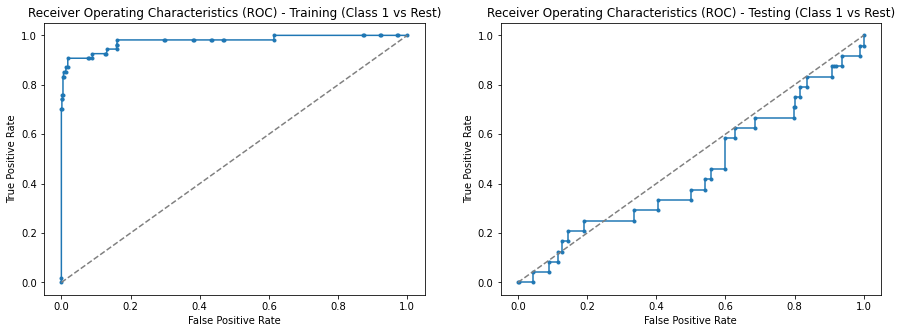

In [21]:
# this part is for the ROC curve
# since we have 10 different classes: we have only shown the curve using class 0 vs rest of the class
# the others can be shown in similar way or even plot inside the same graph
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# specify the class for which you want to view the ROC
class_number = 1

# predict probabilities
lr_probs_train = pipeline_lr.predict_proba(X_train)
lr_probs_test = pipeline_lr.predict_proba(X_test)

# roc curve statistics [false and true positive rates] for classes
fpr_train = {}
tpr_train = {}
fpr_test = {}
tpr_test = {}
thresh_train ={}
thresh_test = {}

# true positive rate and false positive rate for all classes: One vs Rest Classifier
for i in range(len(class_names)):    
    fpr_train[i], tpr_train[i], thresh_train[i] = roc_curve(y_train, lr_probs_train[:,i], pos_label=i)
    fpr_test[i], tpr_test[i], thresh_test[i] = roc_curve(y_test, lr_probs_test[:,i], pos_label=i)

print('ROC AUC (Training: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_train[class_number], tpr_train[class_number])))
print('ROC AUC (Testing: Class {} vs Rest)={:.3f}'.format(class_number, auc(fpr_test[class_number], tpr_test[class_number])))
  
# plot the roc curve for the training set: shown only regarding Class 0
_ = plt.figure(figsize=(15, 5))
ax1 =plt.subplot(121)
_ = ax1.plot(fpr_train[0], tpr_train[0], marker='.') # change the index here to view Class 1 vs Rest, Class 2 vs Rest, etc.
_ = ax1.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax1.set_title('Receiver Operating Characteristics (ROC) - Training (Class {} vs Rest)'.format(class_number))
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')

# plot the roc curve for the testing set: shown only regarding Class 0
ax2 = plt.subplot(122)
_ = ax2.plot(fpr_test[0], tpr_test[0], marker='.')
_ = ax2.plot([0,1], [0, 1], 'gray', linestyle='--', marker='')
_ = ax2.set_title('Receiver Operating Characteristics (ROC) - Testing (Class {} vs Rest)'.format(class_number))
_ = ax2.set_xlabel('False Positive Rate')
_ = ax2.set_ylabel('True Positive Rate')